In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
import palettable
pd.options.mode.chained_assignment = None
plot_root = '../plots'

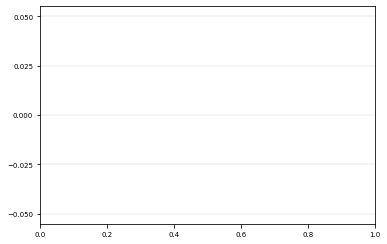

In [2]:
mpl.__version__
mpl.rcParams.update({'font.size': 7})
mpl.rcParams['axes.grid'] = True
mpl.rcParams.update({'axes.grid.axis':'y','grid.color':'#949494','grid.linewidth':0.2})
plt.locator_params(axis='y', nbins=5)   # y-axis

In [3]:
def plot_fig2(fig, lodf):
    ax1, ax2, ax3, ax4, ax5, ax6 = fig.get_axes()
    ax1.set_position([.1, .6, .2, .35])
    ax2.set_position([.425, .6, .2, .35])
    ax3.set_position([.75, .6, .2, .35])
    ax4.set_position([.1, .15, .2, .35])
    ax5.set_position([.425, .15, .2, .35])
    ax6.set_position([.75, .15, .2, .35])
    handles = []
    for i in range(len(lodf)):
        df = lodf[i]
        colour = 'C' + str(i)
        dfplot = df[(df['regionbase']=='OECD37 as Home') & (df['tax_sce'] == 'Unilateral')] 
        dfplot['eff_te']=dfplot['te']-dfplot['tb']
        l,=ax1.plot(dfplot['varphi'],dfplot['Qeworld_prime'], color= colour,linewidth=0.5,linestyle='dashed')
        ax2.plot(dfplot['varphi'],dfplot['pe'], color=colour,linewidth=0.5,linestyle='dashed')
        ax3.plot(dfplot['varphi'],dfplot['jxbar_prime'], color=colour,linewidth=0.5,linestyle='dashed')
        ax4.plot(dfplot['varphi'],dfplot['welfare'], color=colour,linewidth=0.5,linestyle='dashed')
        ax5.plot(dfplot['varphi'],dfplot['tb'], color=colour,linewidth=0.5,linestyle='dashed')
        ax5.plot(dfplot['varphi'],dfplot['eff_te'], color=colour,linewidth=0.5,linestyle='dashdot')
        ax6.plot(dfplot['varphi'],dfplot['subsidy_ratio'], color=colour,linewidth=0.5,linestyle='dashed')
        handles.append(l)
        
    ax4.set_xlabel('Marginal harm')
    ax5.set_xlabel('Marginal harm')
    ax6.set_xlabel('Marginal harm')
    ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
    ax2.set_ylabel('Energy price')
    ax3.set_ylabel('Export margin')
    ax4.set_ylabel('Change in welfare')
    ax5.set_ylabel('Tax rates')
    ax6.set_ylabel('Maximum export subsidy \nrelative to cost')
    
    ax5.set_ylim(0,10)
    return handles

    

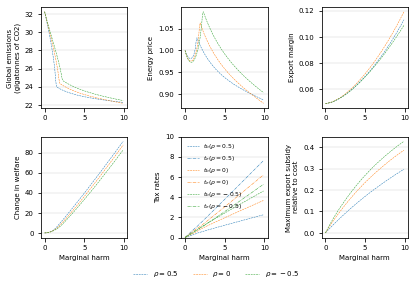

In [101]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
lorho = [0.5,0,-0.5]
labels = [r"$\rho = {0}$".format(x) for x in lorho]
labels2 = []
for rho in lorho:
    labels2.append(r"$t_b (\rho = {0})$".format(rho))
    labels2.append(r"$t_e (\rho = {0})$".format(rho))
labels2

handles = plot_fig2(fig, [df1, df2,df3])
ax4.legend(handles = handles , labels=labels,
                loc='upper left', bbox_to_anchor=(1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

ax5.legend((labels2),fontsize=6, loc='upper left', 
            shadow=False, frameon=False)
plt.savefig(plot_root + '/sig0/fig2.pdf', format='pdf', bbox_inches = 'tight')

In [95]:
def plot_tax(fig, lodf, xlow = -35, xhigh = 0, ylow = 0, yhigh = 40, varphi = 20, x = 'welfare_noexternality', y = 'Qeworld_chg'):
    i=0
    for ax in fig.get_axes():
        ax.set_xlim(xlow,xhigh)
        ax.set_ylim(ylow,yhigh)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(True)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        
        df = lodf[i]
        i += 1

        df = df[df['varphi'] <= varphi]
        df_opt = df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)] 
        df_opt['Qeworld_chg']=-(df_opt['Qeworld_prime']-df_opt['Qeworld_prime'].iat[0]) / df_opt['Qeworld_prime'].iat[0] * 100
        #df['Qeworld_chg']=-(df['Qeworld_prime']-Qeworld)/Qeworld*100
        #x = 'varphi'
        #y = 'ratio'

        ##puretp
        df_plot=df[(df['tax_sce']=='puretp') & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l1, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##purete
        df_plot=df[(df['tax_sce']=='purete') & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/ df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l2, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##puretc
        df_plot=df[(df['tax_sce']=='puretc') & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l3, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##production/consumption
        df_plot=df[(df['tax_sce']=='PC_hybrid') & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l4, = ax.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##extracion/production
        df_plot=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l5, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        # #extraction/consumption
        df_plot=df[(df['tax_sce']=='EC_hybrid') & (df['region_scenario']==3)]
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l6, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        # #extraction/consumption/production
        df_plot=df[(df['tax_sce']=='EPC_hybrid') & (df['region_scenario']==3)]
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l8, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-cons-prod')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##unilateral optimal
        df_plot=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l7, = ax.plot(df_plot[x],df_plot[y],linestyle='solid', label = 'unilateral optimal')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 
        
        
        

C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/1879777232.py:7: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])


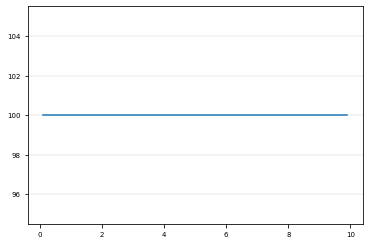

In [87]:
x = 'varphi'
y = 'ratio'
df_opt = df1[(df1['tax_sce']=='Unilateral') & (df1['region_scenario']==3)] 
df_opt['Qeworld_chg']=-(df_opt['Qeworld_prime']-df_opt['Qeworld_prime'].iat[0]) / df_opt['Qeworld_prime'].iat[0]
df_plot=df1[(df1['tax_sce']=='Unilateral') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
plt.plot(df_plot[x],df_plot[y],linestyle='solid', label = 'unilateral optimal')

In [94]:
df1 = pd.read_csv('../output_sig0/ces05.csv')
df2 = pd.read_csv('../output_sig0/ces0.csv')
df3 = pd.read_csv('../output_sig0/ces-05.csv')
#df4 = pd.read_csv('../output_ces/global0.csv')
df2['Qeworld_chg']=-(df2['Qeworld_prime']-df2['Qeworld_prime'][0])/df2['Qeworld_prime'][0]*100
#df4['Qeworld_chg']=-(df4['Qeworld_prime']-df4['Qeworld_prime'][0])/df4['Qeworld_prime'][0]*100
df2['Qeworld_chg']

0       -0.000000
1        0.523243
2        1.044270
3        1.565157
4        2.088041
          ...    
4795    19.409017
4796    19.428406
4797    19.447492
4798    19.466268
4799    19.484756
Name: Qeworld_chg, Length: 4800, dtype: float64

C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/2709235337.py:24: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/2709235337.py:32: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/2709235337.py:40: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/2709235337.py:48: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/2709235337.py:56: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.arra

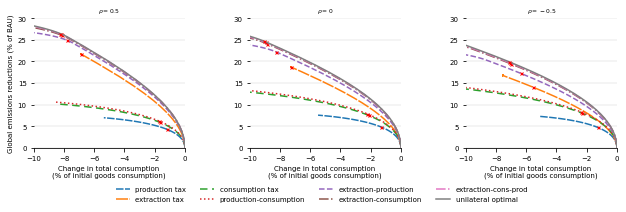

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_position([.1, .4, .35, .45])
ax2.set_position([.6, .4, .35, .45])
ax3.set_position([1.1, .4, .35, .45])
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df1, df2,df3], xlow = -10, xhigh =0, yhigh = 30, varphi = 20)
ylab = 'Global emissions reductions (% of BAU)'
xlab = 'Change in total consumption \n(% of initial goods consumption)'
#ylab = 'Global emissions reduction (% of BAU)'
#xlab = 'varphi'
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)
ax2.set_xlabel(xlab)
ax3.set_xlabel(xlab)
ax1.set_title(r"$\rho = 0.5$", fontsize=6)
ax2.set_title(r"$\rho = 0$", fontsize=6)
ax3.set_title(r"$\rho = -0.5$", fontsize=6)

ax1.legend(loc='upper left', bbox_to_anchor=(0.5, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + '/sig0/fig4.pdf', format='pdf', bbox_inches = 'tight')

C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/2000104477.py:24: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/2000104477.py:32: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/2000104477.py:40: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/2000104477.py:48: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
C:\Users\Alex\AppData\Local\Temp/ipykernel_24988/2000104477.py:56: RuntimeWarning: invalid value encountered in true_divide
  df_plot['ratio'] = np.arra

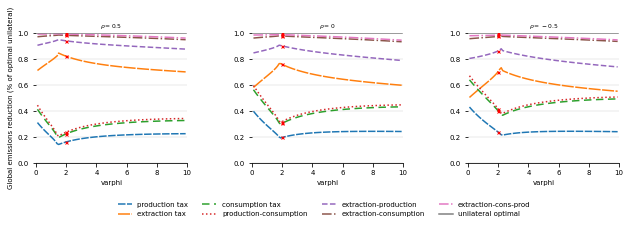

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_position([.1, .4, .35, .45])
ax2.set_position([.6, .4, .35, .45])
ax3.set_position([1.1, .4, .35, .45])
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df1, df2,df3], xlow = 0, xhigh =10, yhigh = 1, varphi = 20, x = 'varphi', y = 'ratio')
# ylab = 'Global emissions reductions (% of BAU)'
# xlab = 'Change in total consumption \n(% of initial goods consumption)'
ylab = 'Global emissions reduction (% of optimal unilateral)'
xlab = 'varphi'
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)
ax2.set_xlabel(xlab)
ax3.set_xlabel(xlab)
ax1.set_title(r"$\rho = 0.5$", fontsize=6)
ax2.set_title(r"$\rho = 0$", fontsize=6)
ax3.set_title(r"$\rho = -0.5$", fontsize=6)

ax1.legend(loc='upper left', bbox_to_anchor=(0.5, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + '/sig0/fig4_ratio.pdf', format='pdf', bbox_inches = 'tight')

In [76]:
df7['Qeworld_chg']

200   -0.000000
201    0.012550
202    0.025212
203    0.038044
204    0.051112
         ...   
295    0.307444
296    0.307752
297    0.308058
298    0.308363
299    0.308667
Name: Qeworld_chg, Length: 100, dtype: float64

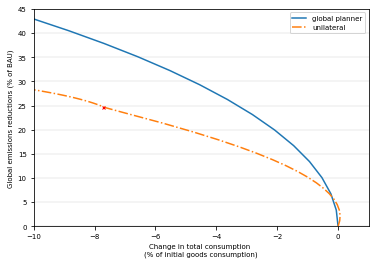

In [97]:
plt.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner')
df_plot = df2[(df2['tax_sce']=='Unilateral') & (df2['region_scenario']==3)] 
plt.plot(df_plot['welfare_noexternality'], df_plot['Qeworld_chg'], linestyle = 'dashdot', label = 'unilateral')

## make dots
dot=df_plot[df_plot['varphi']==2]
plt.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red') 
dot=df4[df4['varphi']==2]
plt.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red') 
plt.xlim(-10,1)
plt.ylim(0, 45)
plt.legend()
plt.xlabel('Change in total consumption \n(% of initial goods consumption)')
plt.ylabel('Global emissions reductions (% of BAU)')
plt.savefig(plot_root + '/ces/global.pdf', format='pdf', bbox_inches = 'tight')

In [111]:
df1['welfare_noexternality']

0        0.000107
1        0.036628
2        0.021577
3       -0.047737
4       -0.174880
          ...    
4795   -12.824341
4796   -12.875332
4797   -12.925829
4798   -12.975832
4799   -13.025350
Name: welfare_noexternality, Length: 4800, dtype: float64

IndexError: list index out of range

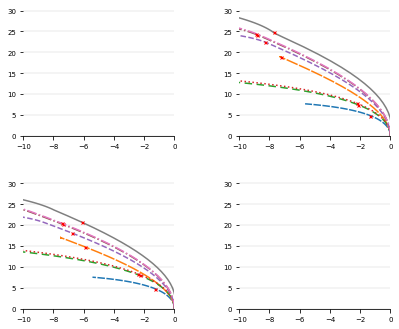

In [25]:
fig, (ax1, ax2), (ax3, ax4) = plt.subplots(2, 2)
ax1.set_position([.1, 1, .35, .45])
ax2.set_position([.6, 1, .35, .45])
ax3.set_position([.1, .4, .35, .45])
ax4.set_position([.6, .4, .35, .45])

plot_tax(fig, [df1, df2,df3], xlow = -10, yhigh = 31)

ax1.set_ylabel('Global emissions reductions (% of BAU)')
ax3.set_ylabel('Global emissions reductions (% of BAU)')
ax3.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
ax4.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
ax1.set_title(r"$\theta = 4, \epsilon_S^* = 0.5$", fontsize=6)
ax2.set_title(r"$\theta = 8, \epsilon_S^* = 0.5$", fontsize=6)
ax3.set_title(r"$\theta = 4, \epsilon_S^* = 2$", fontsize=6) 
ax4.set_title(r"$\theta = 8, \epsilon_S^* = 2$", fontsize=6) 

ax3.legend(loc='upper left', bbox_to_anchor=(-0.1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + '/temp.pdf', format='pdf', bbox_inches = 'tight')

In [ ]:
df_2 = pd.read_csv('../output_ces/ces4.csv')
dft = df_2[(df_2['tax_sce'] == 'Unilateral') & (df_2['region_scenario']==3)]
plt.plot(dft['varphi'], dft['jxbar_prime'])